## Importing Required Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import norm

## Extracting Information Like Email , Phone Number ,Mention , Hashtags, URL, Custom Pattern


In [2]:
def load_text(filepath):
  try:
    with open(filepath,'r',encoding="utf-8") as file:
      return file.read()
  except FileNotFoundError:
    pass

def extract_emails(text):
  data=re.findall(r"\b[a-zA-Z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b",text)
  return data
def extract_phone_numbers(text):
  data=re.findall(r"^(\+1[ -]?)?\(?(\d{3})\)?[ -](\d{3})[ -](\d{4})$",text)
  return data
def extract_url_extraction(text):
  data=re.findall(r"/((?:https?:\/\/|www\.)[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,}(?:\/[^\s]*)?)/g",text)
  return dict(data)
def extract_hashtags(text):
  hasshtagText=re.findall(r"#\w+",text)
  return hasshtagText
def extarct_mentions(text):
  mentions=re.findall(r"@\w+",text)
  return mentions
def extract_dates(text):
  dates=re.findall(r"\d{2}[/\-]\d{2}[/\-]\d{4}|[A-Z][a-z]+ \d{1,2}, \d{4}",text)
  return dates
def extract_currency(text):
  data=re.findall(r"[£$€]\d+(?:\.\d{2})?",text)
  return data
def calculate_word_frequency(text):
  words=re.findall(r'[a-zA-Z]+',text)
  return words

def word_frequency(text):
  freq_list=Counter(text)
  return freq_list
def character_frequency(text):
  freq_list=[Counter(word) for word in text]
  return freq_list
def total_sentences(text):
  sentences=text
  sentences=re.split(r'[.!?]\s*',sentences)
  sentences={s:len(s) for s in sentences}
  sortedSentences=sorted(sentences.items(),key=lambda x:x[1],reverse=True)
  return sortedSentences
def total_no_of_characters(text):
  characters=re.findall(r'\S',text)
  return len(characters)
def total_no_of_sentences(text):
  sentences_with_spaces=re.split(r'[.!?]\S*',text)
  sentences=[s.strip() for s in sentences_with_spaces if s.strip()]
  return sentences
def average_length_of_sentences(text):
    length_of_sentences=[len(s) for s in text]
    return sum(length_of_sentences)/len(length_of_sentences)
def average_length_of_words(text):
  text={w for w in text}
  length_of_words=[len(w) for w in text]
  return sum(length_of_words)/len(length_of_words)
def vowel_consonant_ratio(text):
  vowels=['a','e','i','o','u','A','E','I','O','U']
  vowelsCount=0
  consonantCount=0
  for key,values in text.items():
    if key in vowels:
      vowelsCount+=values
    else:
      consonantCount+=values
  return vowelsCount,consonantCount



## Text Statistics With Numpy

In [3]:
filePath="/content/sherlock.txt"
text_content=load_text(filePath)
if (extract_emails(text_content)):
  print(extract_emails(text_content))
else:
  print("No emails")
words=calculate_word_frequency(text_content)
wordsFrequency=dict(word_frequency(words))
no_of_characters=total_no_of_characters(text_content)
totalSentences=total_no_of_sentences(text_content)
averageLengthOfSentences=average_length_of_sentences(totalSentences)
round(averageLengthOfSentences)
averageLengthOfWords=average_length_of_words(words)
round(averageLengthOfWords)

urlData=extract_url_extraction(text_content)
if (urlData):
  print(urlData)
else:
  print("No urls")

if extract_phone_numbers(text_content):
  print(extract_phone_numbers(text_content))
else:
  print("No phone numbers")
if(extarct_mentions(text_content)):
  print(extarct_mentions(text_content))
else:
  print("No Mentions")

numpyWordsFrequency=np.array(list(wordsFrequency.values()))
type(numpyWordsFrequency)
print("Mean Of Word Frequency:",np.mean(numpyWordsFrequency))
print("Median Of Word Frequency:",np.median(numpyWordsFrequency))
print("Standard DeviationOf Word Frequency:",np.std(numpyWordsFrequency))

print("25th percentile:",np.percentile(numpyWordsFrequency,25))
print("50th percentile:",np.percentile(numpyWordsFrequency,50))
print("75th percentile:",np.percentile(numpyWordsFrequency,75))

print("Extracted HashTags",extract_hashtags(text_content))
print("Extracted Dates: ",extract_dates(text_content))
print("Extracted Currency: ",extract_currency(text_content))
sortedSentences=total_sentences(text_content)
longestSentences=sortedSentences[0][0]
smallestSentences=sortedSentences[-2][0]
print("----------------------------------------")
print("Longest Sentence:")
print(longestSentences)
print("----------------------------------------")
print("Smallest Sentence:")
print(smallestSentences)

No emails
No urls
No phone numbers
No Mentions
Mean Of Word Frequency: 12.413380442215637
Median Of Word Frequency: 2.0
Standard DeviationOf Word Frequency: 105.42930768195718
25th percentile: 1.0
50th percentile: 2.0
75th percentile: 5.0
Extracted HashTags ['#1661']
Extracted Dates:  ['March 1, 1999', 'October 10, 2023', 'April 27, 1890', 'October 9, 1890', 'March 10, 1883']
Extracted Currency:  ['$1', '$5']
----------------------------------------
Longest Sentence:
INDEMNITY - You agree to indemnify and hold the Foundation, the
trademark owner, any agent or employee of the Foundation, anyone
providing copies of Project Gutenberg™ electronic works in
accordance with this agreement, and any volunteers associated with the
production, promotion and distribution of Project Gutenberg™
electronic works, harmless from all liability, costs and expenses,
including legal fees, that arise directly or indirectly from any of
the following which you do or cause to occur: (a) distribution of this
or

In [4]:
characterFrequencyList=character_frequency(set(words))
characterFrequencyDF=pd.DataFrame(characterFrequencyList)
data=characterFrequencyDF.count().reset_index()
data.columns=['Character','Count']
characterFrequencyDict=dict(data.values)
# print(characterFrequencyDict)
vowelRatio,ConaonantRatio=vowel_consonant_ratio(characterFrequencyDict)
print("Vowel Ratio:",vowelRatio)
print("Consonant Ratio:",ConaonantRatio)
mostCommonCharacter=max(characterFrequencyDict,key=characterFrequencyDict.get)
leastCommonCharacter=min(characterFrequencyDict,key=characterFrequencyDict.get)
print("Least Common Character:",leastCommonCharacter)
print("Most Common Character:",mostCommonCharacter)

Vowel Ratio: 18130
Consonant Ratio: 33502
Least Common Character: Z
Most Common Character: e


## Exporting Statistics Of A DataFame Into A CSV File

In [5]:
metaData={
    'fileName':"sherlock.txt",
    'word':[i for i,j in wordsFrequency.items()],
    'wordCount':[j for i,j in wordsFrequency.items()],
    'characterCount':[len(i) for i,j in wordsFrequency.items()]
}

metaDataDF=pd.DataFrame(metaData)
metaDataDF.describe().to_csv("meta data")

## Data Visualization With Matplotlib

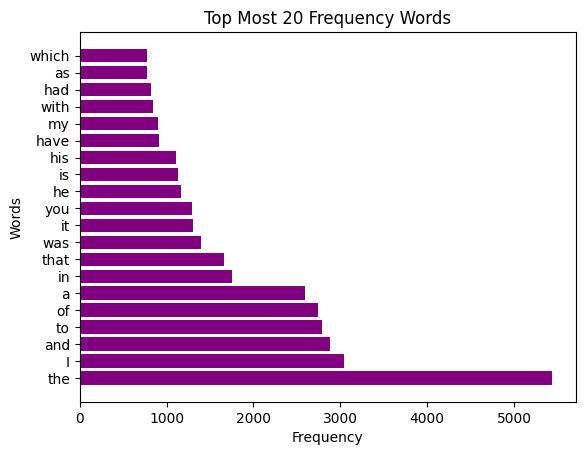

In [6]:
sortedWordFrequency=sorted(wordsFrequency.items(), key=lambda x:x[1],reverse=True)
df=pd.DataFrame(sortedWordFrequency,columns=["words","frequency"])
words1=df['words'].head(20)
frequency=df['frequency'].head(20)

plt.barh(words1,frequency,color='purple')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top Most 20 Frequency Words")
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1119239505.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
/tmp/ipython-input-1119239505.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')


Dataset Size (N): 8774
Mean (µ): 12.41
Standard Deviation (σ): 105.43



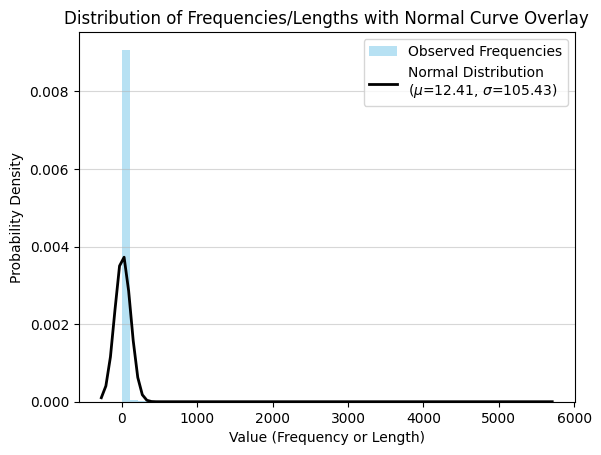

In [7]:
data_values=list(wordsFrequency.values())
data = np.array(data_values)
mu = np.mean(data)
sigma = np.std(data)
print(f"Dataset Size (N): {len(data)}")
print(f"Mean (µ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}\n")
n, bins, patches = plt.hist(data, bins=50, density=True, alpha=0.6, color='skyblue', label='Observed Frequencies')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
title = "Distribution of Frequencies/Lengths with Normal Curve Overlay"
plt.title(title)
plt.xlabel("Value (Frequency or Length)")
plt.ylabel("Probability Density")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.show()

<BarContainer object of 15 artists>

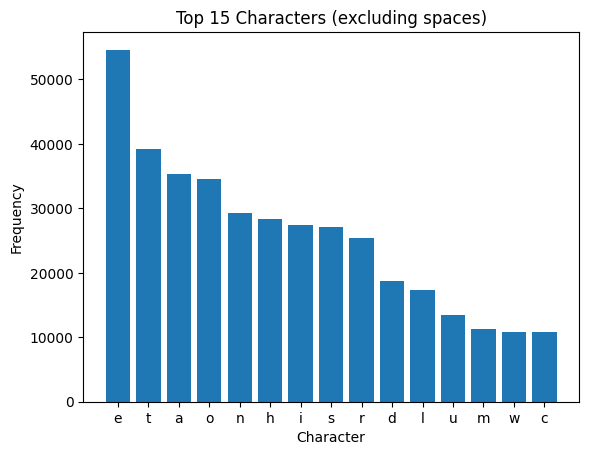

In [8]:
data=re.findall(r'[a-zA-Z]',text_content)
dataFrequency=Counter(data)
descending=sorted(dataFrequency.items(),key=lambda x:x[1],reverse=True)
descending=dict(descending)
ascending=sorted(dataFrequency.items(),key=lambda x:x[1])
dataFrequencyDataFrame=pd.DataFrame(descending.items(),columns=['Character','Frequency'])

characterList=list(dataFrequencyDataFrame['Character'])
frequency=list(dataFrequencyDataFrame['Frequency'])
characterList=characterList[:15]
frequency=frequency[:15]
frequency

plt.title("Top 15 Characters (excluding spaces)")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.bar(characterList,frequency)




{'whiskers': [<matplotlib.lines.Line2D at 0x7ceebfcce840>,
 'caps': [<matplotlib.lines.Line2D at 0x7ceecae29d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ceebfd22db0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ceebfc01130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ceebfc01d00>],
 'means': []}

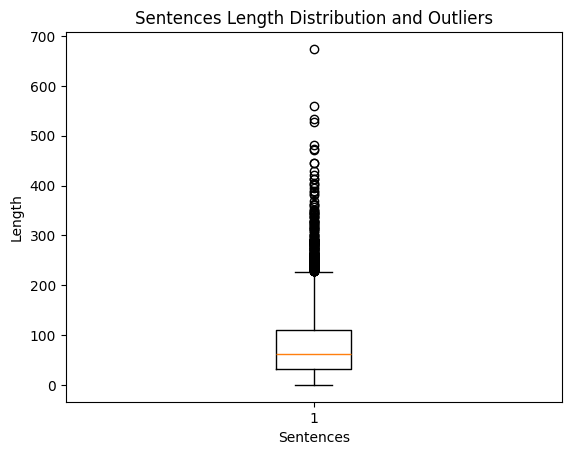

In [9]:
sentences=dict(sortedSentences)
plt.title("Sentences Length Distribution and Outliers")
plt.xlabel("Sentences")
plt.ylabel("Length")
plt.boxplot(sentences.values())


<BarContainer object of 15 artists>

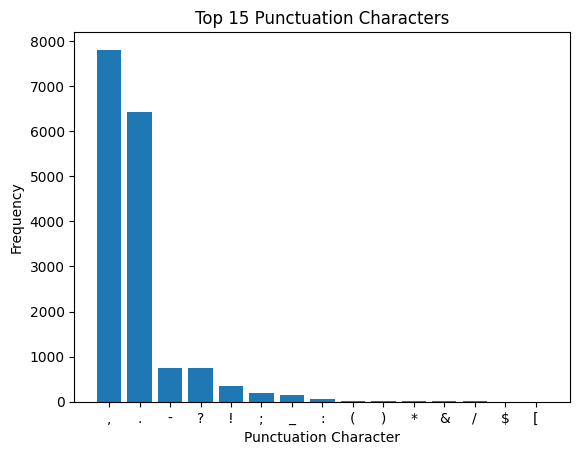

In [10]:
punctuationData=re.findall(r'[!"#$%&\'()*+,-./:;<=>?@\[\\\]^_`{|}~]',text_content)
punctuationDataFrequency=Counter(punctuationData)
punctuationDataFrequency=dict(punctuationDataFrequency)
sortedPunctuation=sorted(punctuationDataFrequency.items(),key =lambda x:x[1],reverse=True)
punctuationDataFrame=pd.DataFrame(sortedPunctuation,columns=['PunctuationCharacter','Frequency'])
punctuationCharacters=list(punctuationDataFrame['PunctuationCharacter'])
punctuationFrequency=list(punctuationDataFrame['Frequency'])
punctuationCharacters=punctuationCharacters[:15]
punctuationFrequency=punctuationFrequency[:15]
plt.title("Top 15 Punctuation Characters")
plt.xlabel("Punctuation Character")
plt.ylabel("Frequency")
plt.bar(punctuationCharacters,punctuationFrequency)

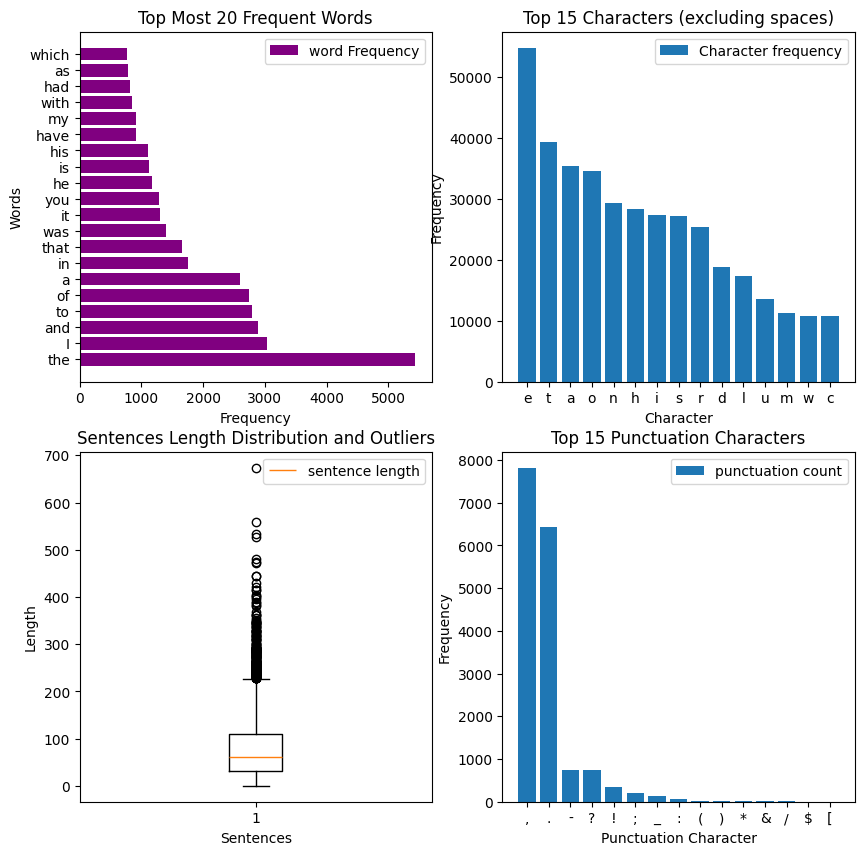

In [11]:
correct_word_frequencies = df['frequency'].head(20)

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
ax1.barh(words1, correct_word_frequencies,color='purple',label="word Frequency")
ax1.set_title("Top Most 20 Frequent Words")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Words")
ax1.legend()

ax2.bar(characterList,frequency,label="Character frequency")
ax2.set_title("Top 15 Characters (excluding spaces)")
ax2.set_xlabel("Character")
ax2.set_ylabel("Frequency")
ax2.legend()

ax3.boxplot(sentences.values(),label="sentence length")
ax3.set_title("Sentences Length Distribution and Outliers")
ax3.set_xlabel("Sentences")
ax3.set_ylabel("Length")
ax3.legend()

ax4.bar(punctuationCharacters,punctuationFrequency,label="punctuation count")
ax4.set_title("Top 15 Punctuation Characters")
ax4.set_xlabel("Punctuation Character")
ax4.set_ylabel("Frequency")
ax4.legend()

plt.show()

## Pandas Data Analysis

In [12]:
def vowel_count(text):
  data=re.findall(r'[aeiouAEIOU]',text)
  return len(data)

data1={
    'filpath':filePath,
    'word':wordsFrequency.keys(),
    'length':[len(word) for word in wordsFrequency.keys()],
    'firstChar':[word[0] for word in wordsFrequency.keys()],
    'vowelCount':[vowel_count(word) for word in wordsFrequency.keys()],
    'frequency':wordsFrequency.values()
}

df=pd.DataFrame(data1)
wordDf=df.groupby('length').describe()
firstcharDf=df.groupby('firstChar')
sortDf=df.sort_values(by='frequency',axis=0,ascending=False)
filterdValues=df[sortDf['length']>10].head(50)
data=wordDf
print("Statistics On Performing Group By On Word Length")
print("--------------------------------------------------")
print(wordDf)
print("Showing Words Greaten Than Length 10 and Showing Top 50")
print("--------------------------------------------------")
print(filterdValues)

Statistics On Performing Group By On Word Length
--------------------------------------------------
       vowelCount                                                frequency  \
            count      mean       std  min   25%  50%   75%  max     count   
length                                                                       
1            33.0  0.242424  0.435194  0.0  0.00  0.0  0.00  1.0      33.0   
2            93.0  0.838710  0.398102  0.0  1.00  1.0  1.00  2.0      93.0   
3           327.0  1.131498  0.440808  0.0  1.00  1.0  1.00  3.0     327.0   
4           939.0  1.439830  0.515589  0.0  1.00  1.0  2.00  3.0     939.0   
5          1254.0  1.763158  0.603698  0.0  1.00  2.0  2.00  4.0    1254.0   
6          1430.0  2.171329  0.578979  1.0  2.00  2.0  2.00  4.0    1430.0   
7          1468.0  2.540191  0.632363  1.0  2.00  3.0  3.00  4.0    1468.0   
8          1223.0  2.931316  0.710127  1.0  2.00  3.0  3.00  5.0    1223.0   
9           882.0  3.370748  0.704908  1.0

/tmp/ipython-input-3883418568.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterdValues=df[sortDf['length']>10].head(50)
